defaultdict(<function list_struct at 0x00000286AEFA5280>, {'Philippines': [0.004956196637728319, 0.0026275313833182797, 0.0093904754254428, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Covid': [0.00631911532385466, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19': [0.003304131091818879, 0.0019706485374887095, 0.005548917296852563, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Manila': [0.0057822294106830395, 0.0026275313833182797, 0.0012805193761967451, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'residents': [0.0022084360326572474, 0.00526861812313582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'crowd': [0.00315955766192733, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'vaccination': [0.004130163864773598, 0.005255062766636559, 0.0012805193761967451, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'centers': [0.0033126540489858717, 0.00526861812313582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'in': [0.009912393275456639, 0.00985324268744355, 0.0029878785444590727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'rush': [0.003159557

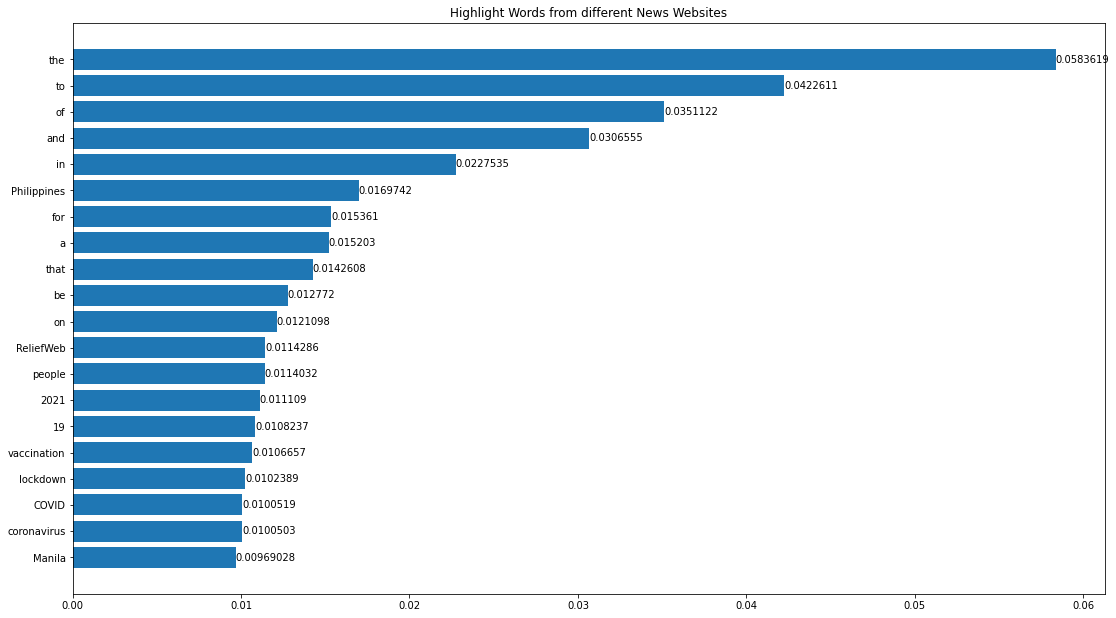

In [1]:
import re
import math

import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from bs4 import BeautifulSoup
from collections import defaultdict, OrderedDict
import itertools



urls = [
        "https://edition.cnn.com/2021/08/06/asia/manila-philippines-vaccine-lockdown-intl-hnk/index.html",
        "https://apnews.com/article/health-coronavirus-pandemic-philippines-4935ed3b84db33a7f68768d07099cf2a",
        "https://reliefweb.int/report/philippines/3m-moderna-vaccines-us-government-arrive-through-covax-facility",

]

def all_words_list(urls):

    all_words = []
    
    for url in urls:
        html = urlopen(url).read()
        soup = BeautifulSoup(html, features="html.parser")
        for script in soup(["script", "style"]):
            script.extract()  
        text = soup.get_text()
        text = re.sub(r'[^\w]', ' ', text)
        bagofwords = text.split(' ')
        bagofwords = [x for x in bagofwords if x]
        all_words.append(bagofwords)

    return all_words

def list_struct(): return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



all_words = all_words_list(urls)


words_tf = defaultdict(list_struct)
words_idf = {}
words_tf_idf = defaultdict(list_struct)
words_tf_idf_sum = {}

for i in range(len(all_words)):
    words = all_words[i]
    n = len(words)
    for word in words:
        tf_list = words_tf[word]
        tf_list[i] = ((tf_list[i] * n) + 1) / n
        words_tf[word] = tf_list




for key in words_tf.keys():
    zero = words_tf[key].count(0)
    f = 10 - zero

    words_idf[key] = math.log10(10/f)


for key in words_tf.keys():
    Sum = 0.0
    for i in range(len(words_tf[key])):
        tf = words_tf[key][i]
        score = tf * words_idf[key]
        Sum += score
        words_tf_idf[key][i] = score
    words_tf_idf_sum[key] = Sum




words_tf_idf_sum = dict(sorted(words_tf_idf_sum.items(), key=lambda item: item[1], reverse=True))

print(words_tf_idf)
print()
print()
print(words_tf_idf_sum)

sliced_words_tf_idf_sum = dict(itertools.islice(words_tf_idf_sum.items(), 20))


x = list(sliced_words_tf_idf_sum.keys())
y = list(sliced_words_tf_idf_sum.values())

ind = np.arange(len(y))

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)

ax.bar_label(ax.containers[0])
plt.gca().invert_yaxis()
plt.title("Highlight Words from different News Websites")
plt.show()